### Part III
### **<u>Objective</u>**:

Contructing a base model. Choosing Decision Tree as base model since it doesn't require label or one hot encoding.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("mushrooms.csv")
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
df = df.drop(columns= 'veil-type')
df = df.drop(columns= 'stalk-root')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

X = df.drop("class", axis=1)
y = df["class"]
X = pd.get_dummies(X).astype(int)


# Split
##X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, criterion= 'entropy')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))



0.9624615384615385


In [17]:
'''
X_encoded['class'] = y_encoded
correlations = X_encoded.corr()['class'].abs().sort_values(ascending=False)
print(correlations.head(10))
'''

"\nX_encoded['class'] = y_encoded\ncorrelations = X_encoded.corr()['class'].abs().sort_values(ascending=False)\nprint(correlations.head(10))\n"

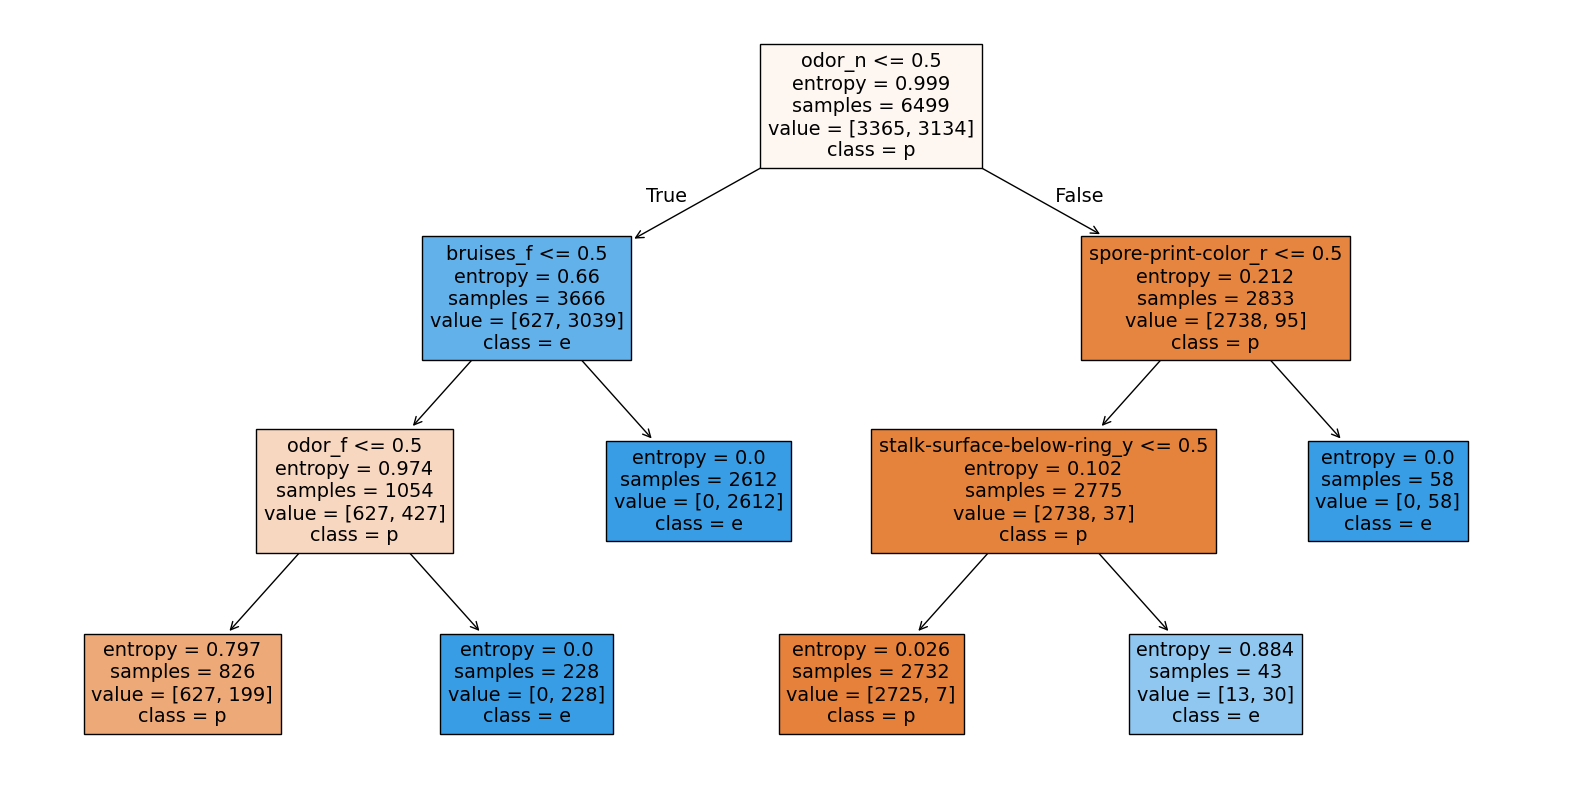

In [18]:

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=y, filled=True)
plt.show()

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
from tabulate import tabulate
import numpy as np

model = DecisionTreeClassifier(random_state=42, criterion= 'entropy')
## e = 1, p = 0

#mapping = {'e': 1, 'p': 0}
#y = df["class"].map(mapping).astype(int)

n_splits = 4
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)  # Added shuffle for better generalization
reports = []
accuracies = []
all_reports = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {fold + 1}:")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    print("Accuracy:", accuracy)

    table_data = []
    for class_label, metrics in report.items():
        if class_label not in ['accuracy', 'macro avg', 'weighted avg']:
            table_data.append([class_label, metrics['precision'], metrics['recall'], metrics['f1-score'], metrics['support']])

    header = ["Class", "Precision", "Recall", "F1-Score", "Support"]
    print("Classification Report:")
    print(tabulate(table_data, headers=header, floatfmt=".4f"))
    print("-" * 40)

    all_reports.append(report)
    accuracies.append(accuracy)

print("Mean Performance:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")

print("Mean Performance:")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")


Fold 1:
Accuracy: 1.0
Classification Report:
Class      Precision    Recall    F1-Score    Support
-------  -----------  --------  ----------  ---------
e             1.0000    1.0000      1.0000  1040.0000
p             1.0000    1.0000      1.0000   991.0000
----------------------------------------
Fold 2:
Accuracy: 1.0
Classification Report:
Class      Precision    Recall    F1-Score    Support
-------  -----------  --------  ----------  ---------
e             1.0000    1.0000      1.0000  1045.0000
p             1.0000    1.0000      1.0000   986.0000
----------------------------------------
Fold 3:
Accuracy: 1.0
Classification Report:
Class      Precision    Recall    F1-Score    Support
-------  -----------  --------  ----------  ---------
e             1.0000    1.0000      1.0000  1047.0000
p             1.0000    1.0000      1.0000   984.0000
----------------------------------------
Fold 4:
Accuracy: 1.0
Classification Report:
Class      Precision    Recall    F1-Score    Sup

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, criterion= 'entropy', max_depth= 3)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9624615384615385


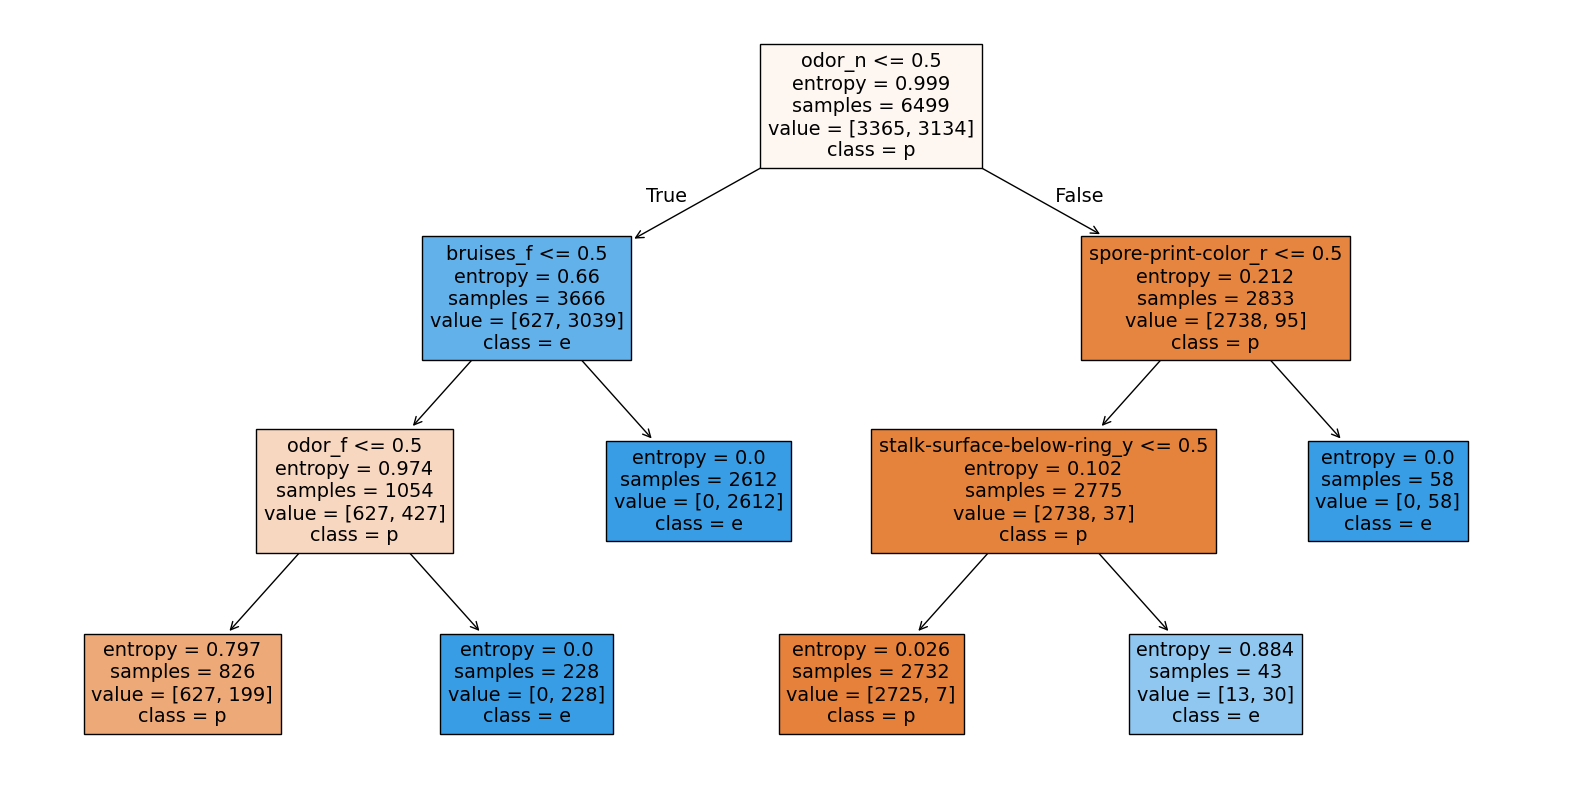

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=y, filled=True)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, criterion= 'gini', max_depth= 3)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9624615384615385


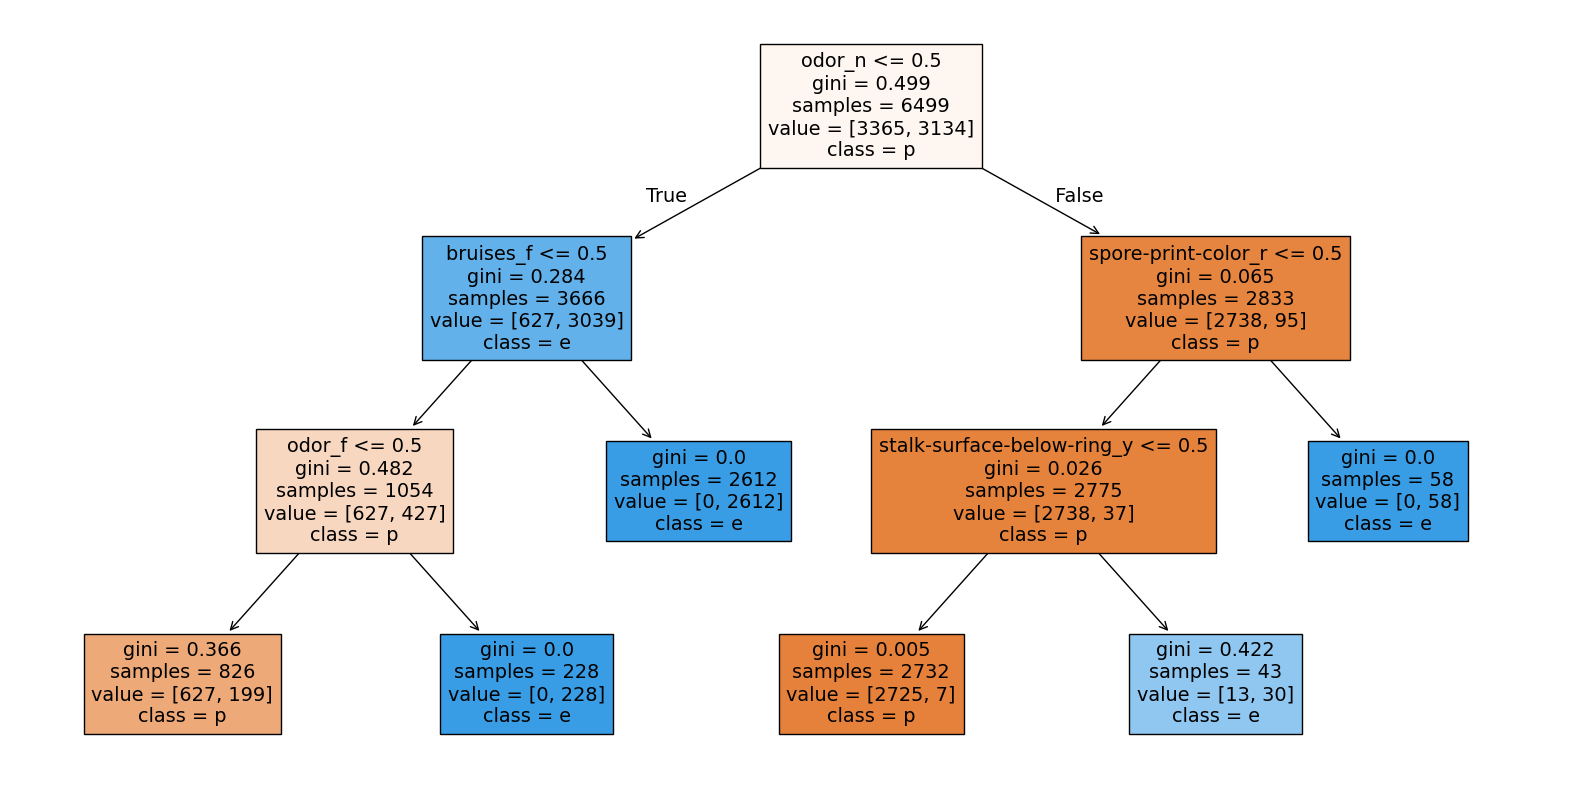

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=y, filled=True)
plt.show()